# The Perceptron

An iterative method of binary classification using targets = {-1, +1}.Predictions are done through standard linear classification techniques i.e. w_T(x)+b

If values fall below 0 then they are placed in the -1 class and if they are above 0, they fall into the +1 class.

### Training

The iterative nature of the perceptron means that the classification rate is expected to converge to a higher value at each iterative step called an "epoch". 

A the start of the process, the weights are randomly initialised using a Nx1 vector and the bias term is set to 0 and is usually absorbed into w.
Through each epoch each misclassified samples from predictions and update their weights at random using w = w + (lr)(y)(x), where lr is the learning rate until the maximum no of epochs is reached or there are no misclassified samples.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#### Predictions

The normal vector of a line ax + by+c = 0 can be used to define a line through using it as the weights. The bias value is the y-intercept and thus can be absorbed by adding another column of X which is equal to 1. As we estimate the w and use it to model the line, we update the weights by determining the angle between the x value being observed and the estimated weight for that value. As shown in the image below in which it is mistakenly classified as +1, if the angle of the estimated weight is less than 90 deg from the actual line, then wTx will be greater than 0, meaning that the target must be -1. The weights will then be updated accordingly by applying w = w - x

<img src="../../images/weight_update.png" height="50%" width="50%">

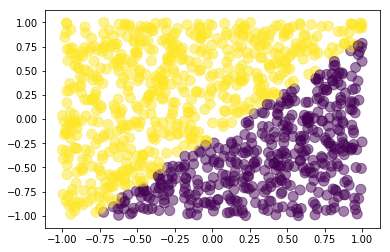

final w: [-0.45043071  0.45015159] final b: 0.09 epochs: 136 / 1000
Training time: 0:00:00.078616
Train accuracy: 1.0
Time taken to compute training accuracy 0:00:00 . Test size: 1000
Test accuracy: 1.0
Time taken to compute testing accuracy 0:00:00 . Test size: 1000


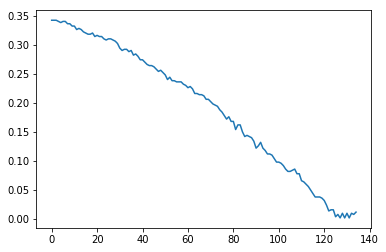

In [2]:
def generate_data(N=1000,D=5):
    w = np.array([-0.5,0.5]) # linearly separable data
    b = 0.1
    X = np.random.random((N,D))*2 -1
    Y = np.sign(X.dot(w)+b)
    return X,Y

class Perceptron(object):
    def fit(self,X,Y, lr=0.01, epochs=1000):
        D = X.shape[1]
        self.w = np.random.random(D)
        self.b = 0
        
        N=len(Y)
        costs = []
        
        for epoch in range(epochs):
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0] # any sample where Y isn't the same as Yhat
            
            # break loop if classification is perfect.
            if len(incorrect) ==0:
                break
                
            # choose random sample from incorrect array
            i = np.random.choice(incorrect)
            self.w += lr*Y[i]*X[i]
            self.b += lr*Y[i]
            
            c= len(incorrect)/float(N)
            costs.append(c)
        print("final w:",self.w,"final b:",self.b,"epochs:",(epoch+1),"/",epochs)
        plt.plot(costs)
        plt.show
    
    def predict(self,X):
        return np.sign(X.dot(self.w)+self.b)
    
    def score(self,X,Y):
        Yhat = self.predict(X)
        return np.mean(Y==Yhat)
    
if __name__ == '__main__':
    X,Y = generate_data(D=2)
    plt.scatter(X[:,0],X[:,1], c=Y, s=100,alpha=0.5)
    plt.show()
    
    Ntrain = int(len(Y)/2)
    Xtrain,Ytrain,Xtest,Ytest =X[:Ntrain],Y[:Ntrain],X[Ntrain:],Y[Ntrain:]
    
    model = Perceptron()
    t0 = datetime.now()
    model.fit(Xtrain,Ytrain)
    print("Training time:",(datetime.now()-t0))
    
    t0=datetime.now()
    print("Train accuracy:", model.score(Xtrain,Ytrain))
    print("Time taken to compute training accuracy",(datetime.now()-t0),". Test size:",len(Y))
    
    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest,Ytest))
    print("Time taken to compute testing accuracy", (datetime.now()-t0),". Test size:",len(Y))

final w: [  4.32397310e-01   4.82618278e-01   3.23754809e-01   7.89944088e-01
   6.40284660e-01   7.02831588e-01   6.59233056e-01   7.44383804e-01
   7.60497179e-01   3.52968491e-01   4.15889353e-01   6.33938298e-01
   4.73684981e-01   7.28556005e-02   2.76658905e-01   1.87052182e-01
   2.47414144e-01   9.02295095e-01   8.50553602e-01   1.63289829e-01
   2.22585653e-01   7.42577191e-01   4.93887471e-01   9.28690644e-01
   4.03560577e-01   3.26477142e-01   4.37462973e-01   5.14148631e-01
   5.16337520e-01   6.47961392e-01   5.56625925e-02   1.88197081e-01
   1.29832526e-01   2.40053732e-01   8.82190723e-01   7.03127447e-01
   3.64253891e-02   2.54780523e-01   5.84658449e-01   3.88237262e-01
   9.82130570e-01   1.02313989e-01   8.09652121e-01   7.92011452e-01
   1.26572955e-01   6.15932735e-02   9.96742704e-01   3.22850126e-01
   3.11349630e-01   2.05212966e-01   3.91296111e-02   8.16305574e-01
   7.56284532e-01   9.80113786e-01   7.58028696e-01   1.08023245e-01
   1.46439072e-01   9.282

c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


final w: [ 0.87455888  0.75055323] final b: 0.0 epochs: 1000 / 1000
XOR accuracy: 0.0


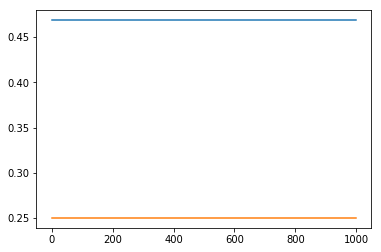

In [3]:
# %load perceptron_mnist_xor.py
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import import_ipynb
#from perceptron_intuition.ipynb import Perceptron
import sys
sys.path.append('../functions/')
from utils import get_mnist_data, generate_simple_xor

fn='../mnist/train.csv'
X,Y = get_mnist_data(fn)

# perceptron is only capable of binary classification
# therfore only take samples where Y==0 and Y==1 then
# change these values to -1 and +1 
idx = np.logical_or(Y==0,Y==1)
X,Y = X[idx],Y[idx]
Y[Y==0] == -1

model = Perceptron()
t0 = datetime.now()
model.fit(X,Y,lr=10e-3)
print('MNIST train accuracy:',model.score(X,Y))

print('\n XOR results:')
X,Y = generate_simple_xor()
model.fit(X,Y)
print('XOR accuracy:',model.score(X,Y))

